#### Company Introduction

Alibaba is the biggest e-commerce company in China and among the biggest in the world. In additon to being a successful e-commerce site alibaba is also one of the biggest retailers in the world. From the alibaba site, alibaba genereated 1 trillion in GMV the past year and 945 billion of that came from chinese retail marketplaces"

#### Key Imports

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading in Data

In [56]:
data=pd.read_csv('C:/Users/jovan/Downloads/BABA.csv')

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-05,226.520004,226.699997,217.539993,220.220001,220.220001,15766100
1,2020-02-06,223.130005,223.649994,219.779999,220.899994,220.899994,10790800
2,2020-02-07,217.460007,217.839996,214.880005,216.529999,216.529999,13790300
3,2020-02-10,213.500000,215.770004,212.199997,215.770004,215.770004,17420300
4,2020-02-11,219.910004,220.009995,215.289993,217.210007,217.210007,16073500


#### Adding 10 and 21 Day Moving Average columns

In [9]:
data['MA 10']=data.Close.rolling(10).mean()
data['MA 21']=data.Close.rolling(21).mean()

In [11]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA 10,MA 21
248,2021-01-29,256.029999,258.899994,252.300003,253.830002,253.830002,14693000,258.136002,244.889524
249,2021-02-01,258.799988,265.000000,255.195007,264.690002,264.690002,15289300,260.259001,246.141905
250,2021-02-02,264.570007,265.000000,254.039993,254.500000,254.500000,30534300,260.544002,247.178572
251,2021-02-03,264.700012,268.279999,261.250000,263.429993,263.429993,29179700,260.338002,248.872857
252,2021-02-04,269.579987,269.989990,265.558014,266.959991,266.959991,16691500,261.034001,250.137619


#### Graphing Close, 10 day MA, and 21 day MA

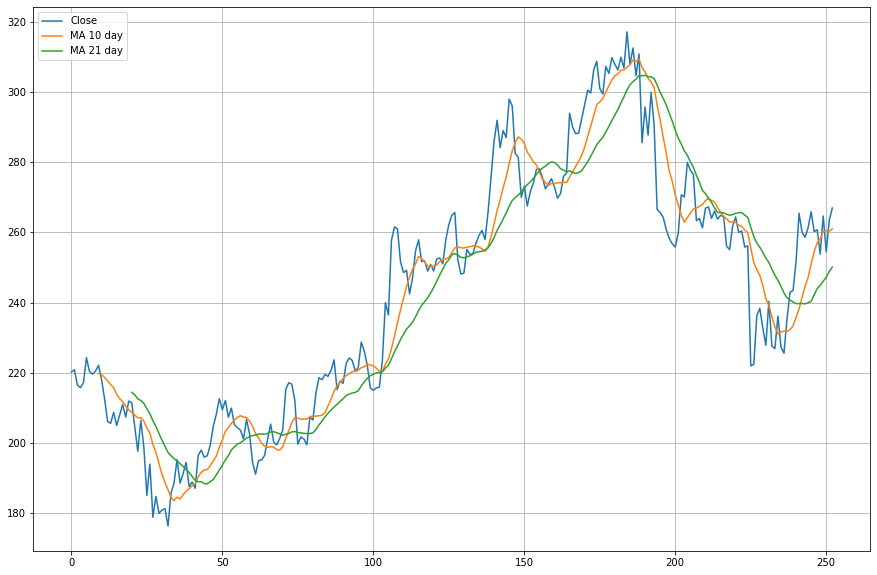

In [17]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(data['Close'], label='Close')
plt.plot(data['MA 10'], label='MA 10 day')
plt.plot(data['MA 21'], label= 'MA 21 day')
plt.legend(loc=2)

The graph shows a fairly consistent growth for the 1st 200 days, reaching a price point of over 300 at one point. However recently it has exhibited a downwards pattern, this is in large part do to new anti trust laws and lawsuits brought against Alibaba. It seems recently it has begun to recover since the almost 30 percent drop in value.

#### Adding and graphing log change column

In [19]:
data['Change']=np.log(data['Close']/data['Close'].shift())

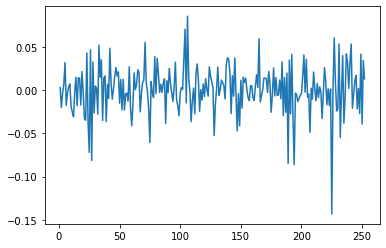

In [30]:
plt.plot(data['Change'])

This graph gives a better sense of the volatility of the stock. As the graph shows there are several instances where the price either increases or decreases by 5 or more percent in a day. With one day having close to a 15 percent drop in price. This makes alibaba a fairly volatile stock, large daily increase or decreases in price.

#### Adding and graphing Volatility Column

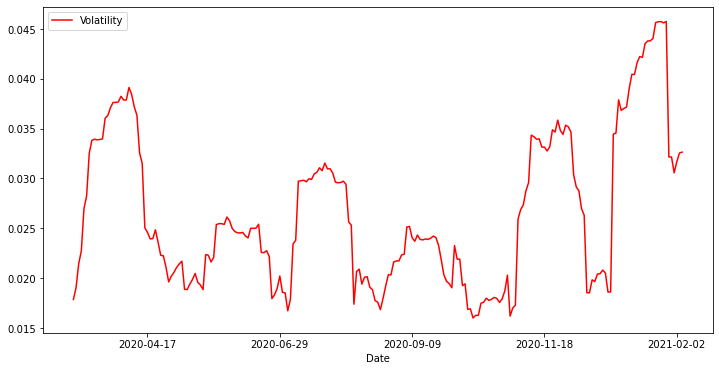

In [27]:
data['Volatility']=data.Change.rolling(21).std().shift()
data.plot(x='Date',y='Volatility',figsize=(12,6),color='r')

This graph gives a clear picture of the price volatility over time. As is shown, the price fluctuates often. Periods of high growth and periods of large drops. Currently it seems to have just exited a period of a large drop and may begin to rebound.

#### Adding Actual change Column

In [31]:
data['Actual_Change']=data['Close']-data['Close'].shift()

In [32]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA 10,MA 21,Change,Volatility,Actual_Change
0,2020-02-05,226.520004,226.699997,217.539993,220.220001,220.220001,15766100,NaN,NaN,NaN,NaN,NaN
1,2020-02-06,223.130005,223.649994,219.779999,220.899994,220.899994,10790800,NaN,NaN,0.003083,NaN,0.679993
2,2020-02-07,217.460007,217.839996,214.880005,216.529999,216.529999,13790300,NaN,NaN,-0.019981,NaN,-4.369995
3,2020-02-10,213.500000,215.770004,212.199997,215.770004,215.770004,17420300,NaN,NaN,-0.003516,NaN,-0.759995
4,2020-02-11,219.910004,220.009995,215.289993,217.210007,217.210007,16073500,NaN,NaN,0.006652,NaN,1.440003


#### Adding Expected Change Column

In [33]:
data['exp_change']=data['Close'].shift()*data['Volatility']

In [35]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA 10,MA 21,Change,Volatility,Actual_Change,exp_change
248,2021-01-29,256.029999,258.899994,252.300003,253.830002,253.830002,14693000,258.136002,244.889524,-0.026936,0.032155,-6.930008,8.384859
249,2021-02-01,258.799988,265.000000,255.195007,264.690002,264.690002,15289300,260.259001,246.141905,0.041895,0.030571,10.860000,7.759855
250,2021-02-02,264.570007,265.000000,254.039993,254.500000,254.500000,30534300,260.544002,247.178572,-0.039259,0.031694,-10.190002,8.389027
251,2021-02-03,264.700012,268.279999,261.250000,263.429993,263.429993,29179700,260.338002,248.872857,0.034487,0.032553,8.929993,8.284844
252,2021-02-04,269.579987,269.989990,265.558014,266.959991,266.959991,16691500,261.034001,250.137619,0.013311,0.032644,3.529998,8.599479


#### Adding and Graphing Magintude Column

In [36]:
data['Magnitude']=data['Actual_Change']/data['exp_change']

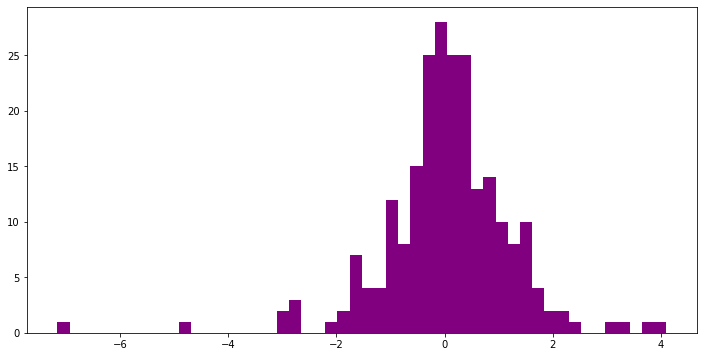

In [48]:
plt.figure(figsize=(12,6))
plt.hist(data['Magnitude'], bins=50, color='purple')
plt.show()

This is a histogram of actual change over expected change. This shows if the price of alibaba tends to change more in a negative way or positive way. As the figure shows, more data is on the negative side. So the price of Alibaba tends to change in a negative way slighly more than in a positive way

#### Adding absolute magnitude column

In [49]:
data['abs_magn']=np.abs(data['Magnitude'])

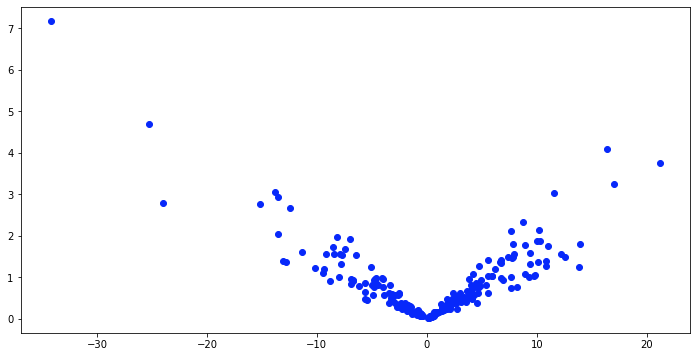

In [55]:
plt.figure(figsize=(12,6))
plt.scatter(data['Actual_Change'], data['abs_magn'], color='#0728fa')

This graph shows the change in dollars(x-axis) and change in std dev (y-axis). Most of the data is centered around a change in 2.5 std dev or less however some major outliers do exist, including an over 7 std dev drop (over 30 dollars). This shows that Alibaba is impacted by large changes in price at certain points, reaffirming the volatility of the stock.